<a href="https://colab.research.google.com/github/Deepaksinghma23m006/machinne_learning_project/blob/main/heart_disease_failure_using%20knn%2Csvc%20and%20multilayer%20network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns

In [83]:
data=pd.read_csv("heart.csv")

In [84]:
data.info

<bound method DataFrame.info of      Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisea

In [85]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


 started from here self

In [86]:
data['Sex'].value_counts() # gives count of column 'sex'

M    725
F    193
Name: Sex, dtype: int64

In [87]:
data = data.drop_duplicates()
data # after removing duplicates


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [88]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [89]:
data.isnull()  # shows false to non null

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
913,False,False,False,False,False,False,False,False,False,False,False,False
914,False,False,False,False,False,False,False,False,False,False,False,False
915,False,False,False,False,False,False,False,False,False,False,False,False
916,False,False,False,False,False,False,False,False,False,False,False,False


In [90]:
data.isnull().sum() # gives counts of true , 0 means no null is there

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [91]:
new_data=data # for some purpose

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(new_data['Sex'])

LabelEncoder()

In [93]:
le.classes_ # gives different element column sex

array(['F', 'M'], dtype=object)

In [94]:
new_data['encode_sex']=le.transform(new_data['Sex']) # added new column "encode sex "

In [95]:
new_data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encode_sex
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


In [96]:
new_data= new_data.drop('Sex' , axis = 1) #removed sex column

In [97]:
new_data

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encode_sex
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,1
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0


Similarly we will do for chest pain type , i.e converting into binary

In [98]:
le.fit(new_data['ChestPainType'])

LabelEncoder()

In [99]:
le.classes_

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [100]:
new_data['encode_chest_pain_type'] = le.transform(new_data['ChestPainType'])

In [101]:
new_data

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encode_sex,encode_chest_pain_type
0,40,ATA,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,ATA,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,NAP,150,195,0,Normal,122,N,0.0,Up,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,TA,110,264,0,Normal,132,N,1.2,Flat,1,1,3
914,68,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1,0
915,57,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1,0
916,57,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0,1


In [102]:
new_data=new_data.drop('ChestPainType',axis = 1 )

In [103]:
new_data

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encode_sex,encode_chest_pain_type
0,40,140,289,0,Normal,172,N,0.0,Up,0,1,1
1,49,160,180,0,Normal,156,N,1.0,Flat,1,0,2
2,37,130,283,0,ST,98,N,0.0,Up,0,1,1
3,48,138,214,0,Normal,108,Y,1.5,Flat,1,0,0
4,54,150,195,0,Normal,122,N,0.0,Up,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,Normal,132,N,1.2,Flat,1,1,3
914,68,144,193,1,Normal,141,N,3.4,Flat,1,1,0
915,57,130,131,0,Normal,115,Y,1.2,Flat,1,1,0
916,57,130,236,0,LVH,174,N,0.0,Flat,1,0,1


In [104]:
le.fit(new_data['RestingECG'])
le.classes_
new_data['encode_restingecg'] = le.transform(new_data['RestingECG'])
new_data = new_data.drop('RestingECG' , axis = 1)

In [105]:
new_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,encode_sex,encode_chest_pain_type,encode_restingecg
0,40,140,289,0,172,N,0.0,Up,0,1,1,1
1,49,160,180,0,156,N,1.0,Flat,1,0,2,1
2,37,130,283,0,98,N,0.0,Up,0,1,1,2
3,48,138,214,0,108,Y,1.5,Flat,1,0,0,1
4,54,150,195,0,122,N,0.0,Up,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,N,1.2,Flat,1,1,3,1
914,68,144,193,1,141,N,3.4,Flat,1,1,0,1
915,57,130,131,0,115,Y,1.2,Flat,1,1,0,1
916,57,130,236,0,174,N,0.0,Flat,1,0,1,0


In [106]:
le.fit(new_data['ExerciseAngina'])
le.classes_
new_data['encode_excerciseangina'] = le.transform(new_data['ExerciseAngina'])
new_data = new_data.drop('ExerciseAngina' , axis = 1)

In [107]:
new_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ST_Slope,HeartDisease,encode_sex,encode_chest_pain_type,encode_restingecg,encode_excerciseangina
0,40,140,289,0,172,0.0,Up,0,1,1,1,0
1,49,160,180,0,156,1.0,Flat,1,0,2,1,0
2,37,130,283,0,98,0.0,Up,0,1,1,2,0
3,48,138,214,0,108,1.5,Flat,1,0,0,1,1
4,54,150,195,0,122,0.0,Up,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,Flat,1,1,3,1,0
914,68,144,193,1,141,3.4,Flat,1,1,0,1,0
915,57,130,131,0,115,1.2,Flat,1,1,0,1,1
916,57,130,236,0,174,0.0,Flat,1,0,1,0,0


In [108]:
le.fit(new_data['ST_Slope'])
le.classes_
new_data['encode_stslope'] = le.transform(new_data['ST_Slope'])
new_data = new_data.drop('ST_Slope' , axis = 1)


In [109]:
new_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,encode_sex,encode_chest_pain_type,encode_restingecg,encode_excerciseangina,encode_stslope
0,40,140,289,0,172,0.0,0,1,1,1,0,2
1,49,160,180,0,156,1.0,1,0,2,1,0,1
2,37,130,283,0,98,0.0,0,1,1,2,0,2
3,48,138,214,0,108,1.5,1,0,0,1,1,1
4,54,150,195,0,122,0.0,0,1,2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,3,1,0,1
914,68,144,193,1,141,3.4,1,1,0,1,0,1
915,57,130,131,0,115,1.2,1,1,0,1,1,1
916,57,130,236,0,174,0.0,1,0,1,0,0,1


In [110]:
new_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,encode_sex,encode_chest_pain_type,encode_restingecg,encode_excerciseangina,encode_stslope
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377,0.789760,0.781046,0.989107,0.404139,1.361656
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414,0.407701,0.956519,0.631671,0.490992,0.607056
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000


Text(0.5, 1.0, 'distribution of heartdisease')

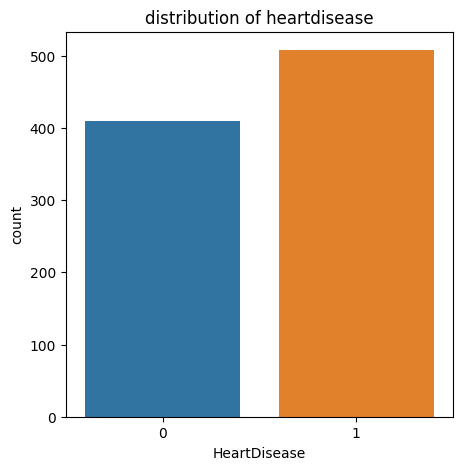

In [111]:
plt.figure(figsize = (5, 5))
sns.countplot(x='HeartDisease' , data=new_data)
plt.title('distribution of heartdisease')

In [112]:
categorical_feature = data.dtypes==object # collectig object type data


In [113]:
categorical_feature

Age               False
Sex                True
ChestPainType      True
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG         True
MaxHR             False
ExerciseAngina     True
Oldpeak           False
ST_Slope           True
HeartDisease      False
encode_sex        False
dtype: bool

In [114]:
final_categorical_feature = data.columns[categorical_feature].tolist()

In [115]:
final_categorical_feature

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [116]:
final_numeric_feature = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [117]:
final_numeric_feature

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [118]:
px.pie(values=data['ChestPainType'].value_counts() , names = data['ChestPainType'].value_counts().index).update_layout(title = 'check pain type')

<function matplotlib.pyplot.show(close=None, block=None)>

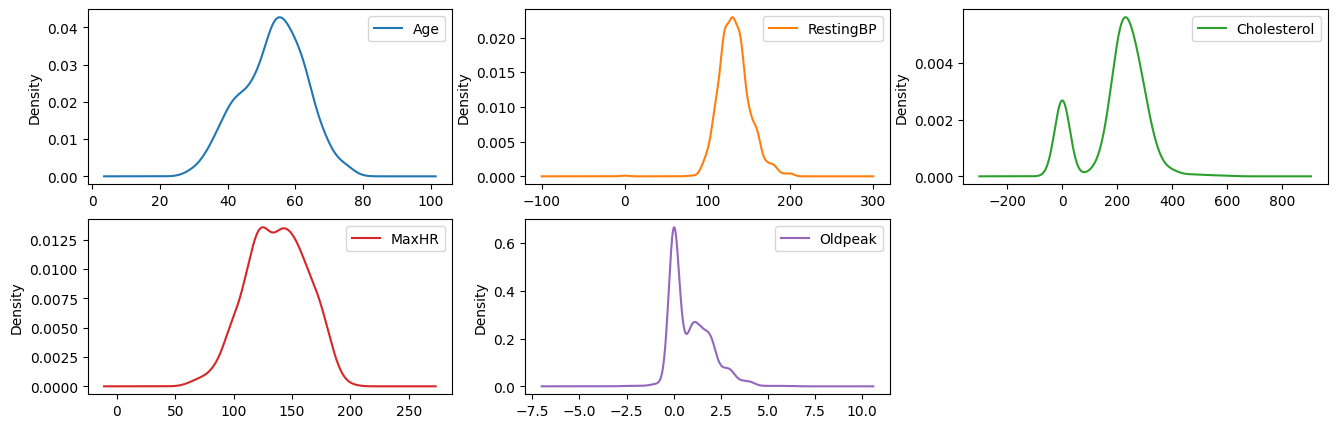

In [119]:
data[final_numeric_feature].plot(kind = 'density' , subplots = True , sharex = False , layout = (2,3) , figsize=(16,5) )
plt.show

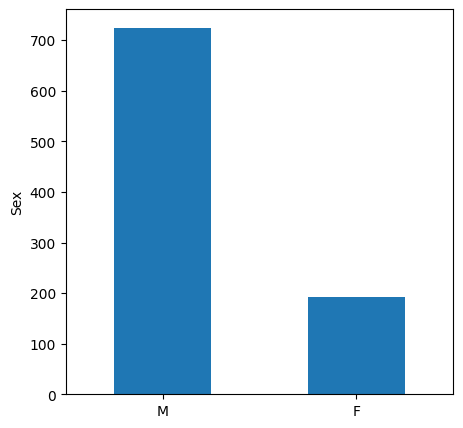

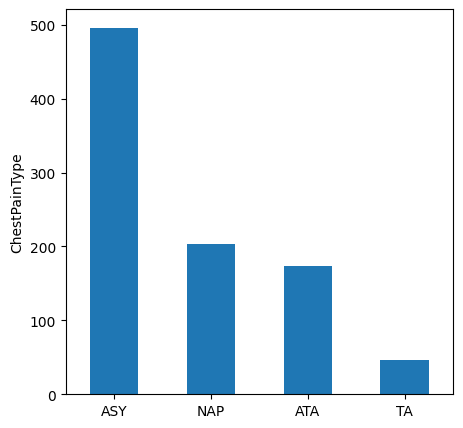

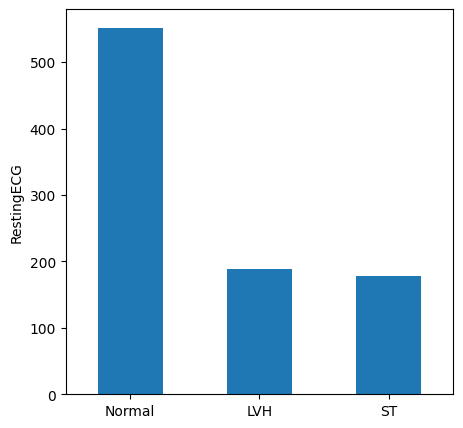

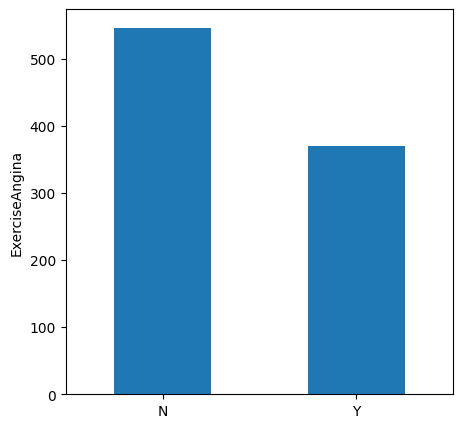

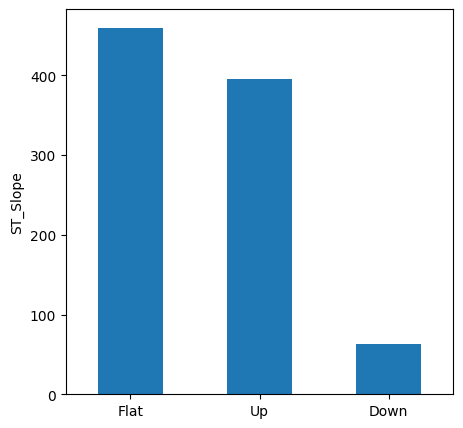

In [120]:
for i in range(len(final_categorical_feature)):
  data[final_categorical_feature[i]].value_counts().plot(kind='bar' , figsize = (5,5))
  plt.xticks(rotation = 'horizontal') # orientation of words on x axis (no need to write this line )
  plt.ylabel(final_categorical_feature[i])
  #plt.update_traces(marker= {"color":"red" , "opacity":0.6 }). -  it dont work here
  plt.show()


In [158]:
data.corr()

<ipython-input-158-c44ded798807>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,encode_sex
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039,0.055750
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589,0.005133
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741,-0.200092
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291,0.120076
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421,-0.189186
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951,0.105734
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000,0.305445
encode_sex,0.055750,0.005133,-0.200092,0.120076,-0.189186,0.105734,0.305445,1.000000


Text(0.5, 1.0, 'correlation for heartdisease')

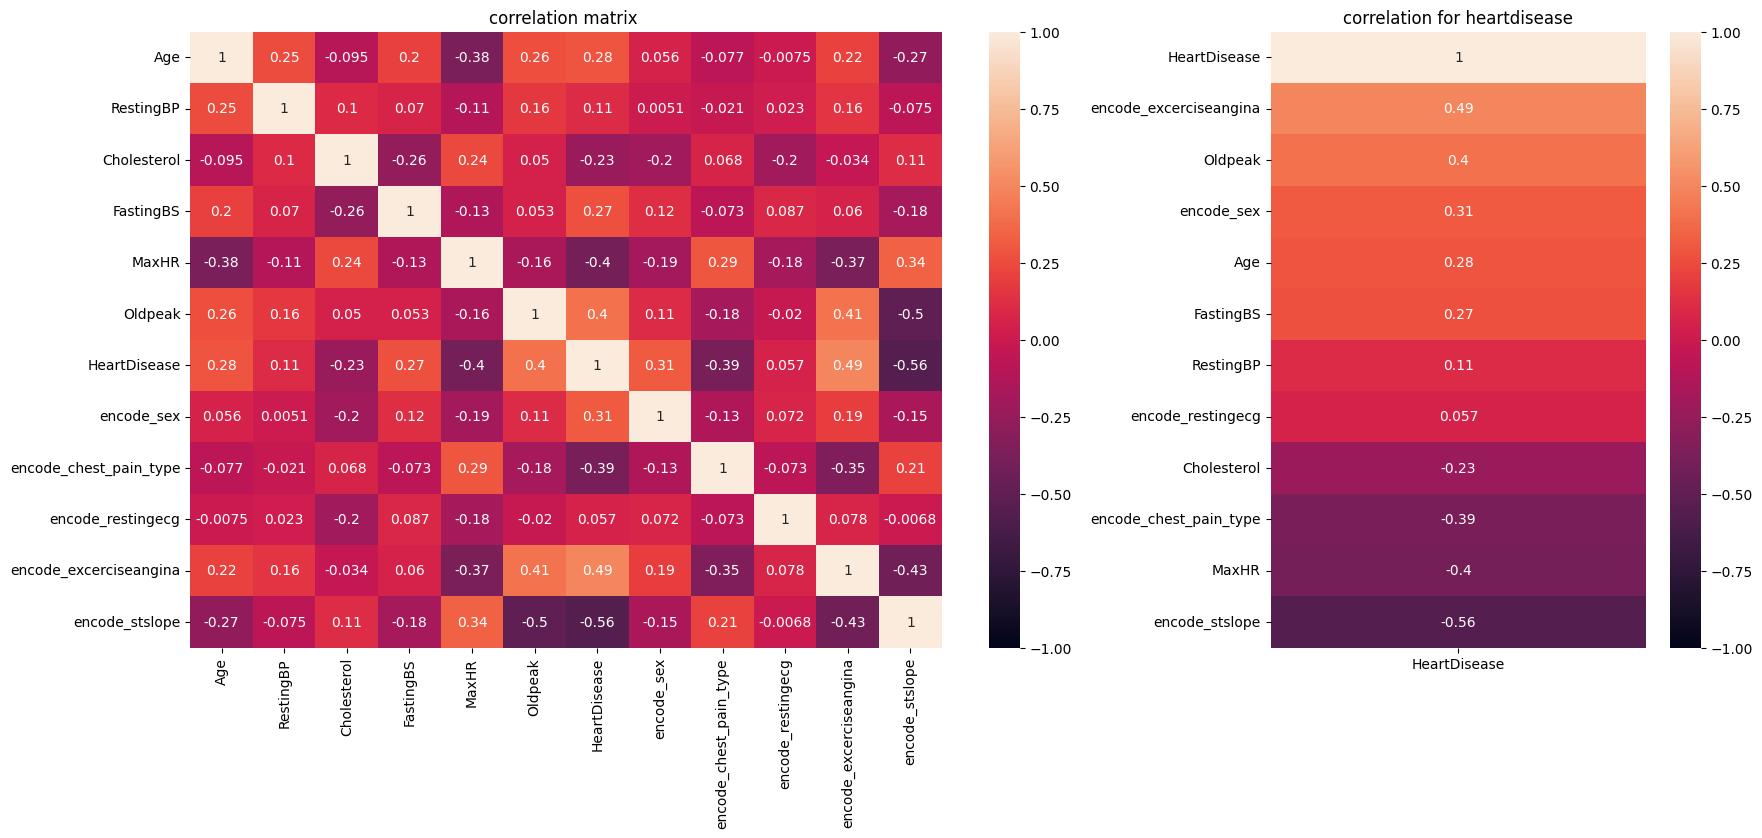

In [121]:
f , axs = plt.subplots(1,2 , figsize = (20,8) , width_ratios=[4,2])

sns.heatmap(data=new_data.corr(method = "pearson" , numeric_only = True ) , annot=True , vmin =-1 , vmax = 1 , ax=axs[0])
axs[0].set_title("correlation matrix ")

sns.heatmap(data=new_data.corr(method="pearson" , numeric_only=True)[["HeartDisease"]].sort_values('HeartDisease' , ascending = False)
,vmin = -1 , vmax = 1 , annot = True , ax = axs[1])

axs[1].set_title("correlation for heartdisease")


#or use data.corr() - to find correlation coefficient



A correlation matrix is a table that shows the correlation coefficients between many variables. Each cell in the table represents the correlation between two variables. The values are in the range of -1 to 1, where:

1: Perfect positive correlation. As one variable increases, the other variable also increases proportionally.

0: No correlation. Changes in one variable do not predict changes in the other variable.

-1: Perfect negative correlation. As one variable increases, the other variable decreases proportionally.
The correlation matrix is a symmetric matrix because the correlation between variable A and variable B is the same as the correlation between variable B and variable A.


Correlation matrices are often used in statistics and data analysis to understand relationships between variables. They are commonly visualized using heatmaps, where colors represent the strength and direction of the correlation: for example, darker colors for strong positive or negative correlations and lighter colors for weaker or no correlations.

In [122]:
plt.figure(figsize=(6,3))
fig = px.histogram(data_frame=data , x="Sex" , title = "distribution of sex ")
fig.update_traces(marker = {"color":"red" , "opacity":0.2})
fig.show()       # similarly plot for chestpain type

<Figure size 600x300 with 0 Axes>

In [123]:
plt.figure(figsize = (8,4))
fig = px.box(data_frame=data , x = "RestingBP" , title="distribution of resting bp")
fig.update_traces(marker= {"opacity":0.2})
fig.show()

<Figure size 800x400 with 0 Axes>

ML starting

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [125]:
datas = ["Age", "Encoder_sex", "Encoder_ChestPainType", "RestingBP", "Cholesterol", "FastingBS", "Encoder_RestingECG", "MaxHR", "Encoder_ExerciseAngina", "Oldpeak", "Encoder_ST_Slope"]
X = new_data.drop('HeartDisease',axis=1)
y = new_data['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [126]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,encode_sex,encode_chest_pain_type,encode_restingecg,encode_excerciseangina,encode_stslope
279,54,130,253,0,155,0.0,0,1,2,0,2
451,64,144,0,0,122,1.0,1,0,2,1,1
39,48,150,227,0,130,1.0,0,0,1,1,1
557,56,137,208,1,122,1.8,1,2,2,1,1
548,66,112,261,0,140,1.5,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...
835,54,110,239,0,126,2.8,1,0,1,1,1
192,48,130,245,0,160,0.0,1,1,1,0,2
629,57,128,303,0,159,0.0,0,0,0,0,2
559,64,134,273,0,102,4.0,1,0,1,1,0


In [127]:
scaler = StandardScaler()  # StandardScaler is a preprocessing technique in machine learning used to standardize the features of a dataset. It scales the features so that they have a mean of 0 and a standard deviation of 1.
X_train=scaler.fit_transform(X_train) # fit_transform method first computes the mean and standard deviation of the features in the training data and then scales the data based on these computed values. The result is that the training data is now standardized.
X_test = scaler.fit_transform(X_test)

In [128]:
X_train

array([[ 0.0485459 , -0.1308378 ,  0.49219339, ...,  1.58061258,
        -0.82592469,  1.03147389],
       [ 1.11222687,  0.61885265, -1.89657423, ...,  1.58061258,
         1.21076415, -0.59617298],
       [-0.58966268,  0.94014856,  0.24670739, ..., -0.00692239,
         1.21076415, -0.59617298],
       ...,
       [ 0.3676502 , -0.23793643,  0.96428185, ..., -1.59445736,
        -0.82592469,  1.03147389],
       [ 1.11222687,  0.08335948,  0.68102878, ..., -0.00692239,
         1.21076415, -2.22381986],
       [-0.69603077, -1.30892279,  0.3977757 , ..., -0.00692239,
        -0.82592469,  1.03147389]])

Feature scaling is important in machine learning because it helps algorithms that are sensitive to the scale of the input features converge faster and perform better. Examples of such algorithms include support vector machines, k-nearest neighbors, and neural networks. By standardizing the features, you make sure that each feature contributes equally to the model training process.

Now we will do support vector machines

In [129]:
svm_classifier = SVC(kernel = 'linear') # to make it 1 dim. and algorithm will try to find a linear decision boundary.
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [130]:
X_train

array([[ 0.0485459 , -0.1308378 ,  0.49219339, ...,  1.58061258,
        -0.82592469,  1.03147389],
       [ 1.11222687,  0.61885265, -1.89657423, ...,  1.58061258,
         1.21076415, -0.59617298],
       [-0.58966268,  0.94014856,  0.24670739, ..., -0.00692239,
         1.21076415, -0.59617298],
       ...,
       [ 0.3676502 , -0.23793643,  0.96428185, ..., -1.59445736,
        -0.82592469,  1.03147389],
       [ 1.11222687,  0.08335948,  0.68102878, ..., -0.00692239,
         1.21076415, -2.22381986],
       [-0.69603077, -1.30892279,  0.3977757 , ..., -0.00692239,
        -0.82592469,  1.03147389]])

In [131]:
svm_predictions = svm_classifier.predict(X_test)
svm_predictions

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [132]:
svm_accuracy= accuracy_score(y_test,svm_predictions)
svm_accuracy # or we can use print(f'accuracy score: {svm_accuracy}')

0.8260869565217391

[[ 72  20]
 [ 20 118]]


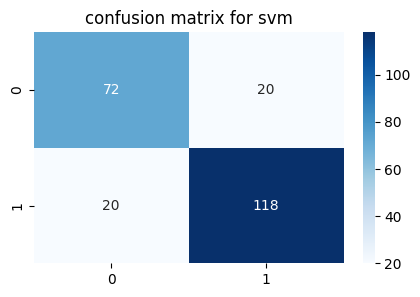

In [133]:
cm = confusion_matrix(y_test,svm_predictions)
print(cm)

plt.figure(figsize = (5,3))
sns.heatmap(confusion_matrix(y_test,svm_predictions) , annot=True , fmt = 'd', cmap = 'Blues' ) #fmt='d' specifies that the values should be integers. The cmap='Blues' parameter sets the color map to shades of blue.
plt.title("confusion matrix for svm")
plt.show()

Now we will use knn

In [134]:
knn_classifier = KNeighborsClassifier(n_neighbors = 5) # kNN algorithm classifies a data point based on the majority class among its k nearest neighbors in the feature space.
knn_classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [135]:
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy=accuracy_score(y_test ,knn_predictions)
knn_accuracy

0.8565217391304348

[[ 75  17]
 [ 16 122]]


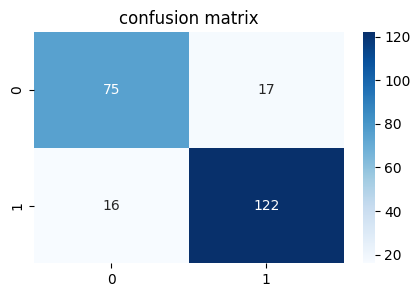

In [136]:
cm=confusion_matrix(y_test,knn_predictions)
print(cm)

plt.figure(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test,knn_predictions) , annot =True , cmap='Blues' , fmt = 'd')
plt.title("confusion matrix")
plt.show()

Now we will compare above two models

 

svm_accuracy : 0.83


 accuracy of knn : 0.86

knn accurcy is greater than svm


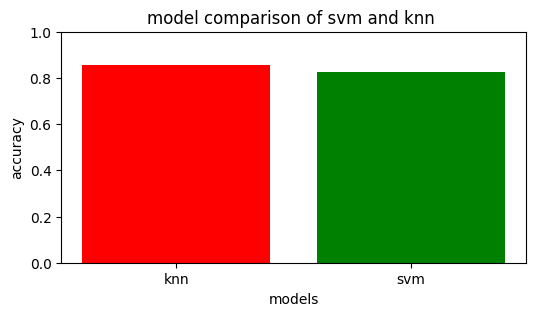

In [137]:
datam= [knn_accuracy,svm_accuracy]
gro = ['knn' , 'svm']

plt.figure(figsize=(6,3))
plt.bar(gro , datam , color = ['red' , 'green'])
plt.title("model comparison of svm and knn ")
plt.ylabel("accuracy")
plt.xlabel("models")
plt.ylim(0,1)


print(f' \n\nsvm_accuracy : {svm_accuracy:.2f}\n')
print(f'\n accuracy of knn : {knn_accuracy:.2f}\n')

if svm_accuracy>knn_accuracy :
  print("svm accuracy is greater than knn")

elif svm_accuracy<knn_accuracy :
  print("knn accurcy is greater than svm")

using multilayer tensorflow and keras libraries

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential #linear stack of layers that allows for easy construction of neural network models layer by layer.
from tensorflow.keras.layers import Dense , Dropout #Dense represents a fully connected layer, and Dropout is a regularization technique that helps prevent overfitting.
from tensorflow.keras.optimizers import Adam # optimization algorithm
from tensorflow.keras.callbacks import EarlyStopping # is used during model training to stop training when a monitored metric (e.g., validation loss) has stopped improving, preventing overfitting and saving computational resources.

In [139]:
#build MLP model
model=Sequential()

In [140]:
print(X_train.shape)

(688, 11)


In [141]:

model.add(Dense(units=12 , input_dim=X_train.shape[1] , activation = 'relu')) # input layer
model.add(Dense(units=6 , activation ='relu'))  # hidden layer
model.add(Dropout(0.5))

In [142]:
model.add(Dense(units=3 , activation = 'relu')) # second hidden layer
model.add(Dropout(0.5))

In [143]:
model.add(Dense(units =1 , activation = 'sigmoid')) # output layer
# Activation ('sigmoid'): Sigmoid activation squashes the output to the range [0, 1], suitable for binary classification where the output represents the probability of the positive class.

In [144]:
model.compile(optimizer=Adam(learning_rate=0.001) ,loss='binary_crossentropy' , metrics = ['accuracy'] )

Model Compilation:

Optimizer: Adam optimizer with a learning rate of 0.001 is used for updating the model weights during training.

Loss Function: Binary crossentropy is the chosen loss function, suitable for binary classification tasks where the goal is to minimize the difference between predicted and true values.

Metrics: Model performance during training and evaluation is measured using accuracy, providing the proportion of correctly classified samples.

In [145]:
early_stopping=EarlyStopping(monitor='val_loss' , patience =10 , restore_best_weights=True)

Early Stopping Definition:

Monitor: Monitors the validation loss during training.

Patience: Waits for 10 epochs before considering early stopping. If the validation loss does not improve for 10 consecutive epochs, training may be stopped.

Restore Best Weights: Restores the model weights from the epoch with the lowest validation loss, preventing overfitting and ensuring the best-performing model is retained.

In [150]:
history = model.fit(X_train,y_train, epochs=100 , batch_size=8 , validation_data=(X_test,y_test) , callbacks=[early_stopping], verbose = 2)

Epoch 1/100
86/86 - 0s - loss: 0.5128 - accuracy: 0.6948 - val_loss: 0.3970 - val_accuracy: 0.8565 - 374ms/epoch - 4ms/step
Epoch 2/100
86/86 - 0s - loss: 0.5147 - accuracy: 0.6788 - val_loss: 0.3996 - val_accuracy: 0.8478 - 298ms/epoch - 3ms/step
Epoch 3/100
86/86 - 0s - loss: 0.5165 - accuracy: 0.6759 - val_loss: 0.3990 - val_accuracy: 0.8435 - 286ms/epoch - 3ms/step
Epoch 4/100
86/86 - 0s - loss: 0.5147 - accuracy: 0.6831 - val_loss: 0.4014 - val_accuracy: 0.8435 - 283ms/epoch - 3ms/step
Epoch 5/100
86/86 - 0s - loss: 0.5365 - accuracy: 0.6541 - val_loss: 0.4023 - val_accuracy: 0.8435 - 343ms/epoch - 4ms/step
Epoch 6/100
86/86 - 0s - loss: 0.5543 - accuracy: 0.6410 - val_loss: 0.4156 - val_accuracy: 0.8435 - 178ms/epoch - 2ms/step
Epoch 7/100
86/86 - 0s - loss: 0.4976 - accuracy: 0.6875 - val_loss: 0.4054 - val_accuracy: 0.8522 - 209ms/epoch - 2ms/step
Epoch 8/100
86/86 - 0s - loss: 0.4921 - accuracy: 0.6730 - val_loss: 0.3968 - val_accuracy: 0.8522 - 183ms/epoch - 2ms/step
Epoch 9/

Training the Model:

Training Data: X_train and y_train are used as the training input features and labels, respectively.

Epochs: The model is trained for 200 epochs, representing the number of times the entire training dataset is passed forward and backward through the neural network.

Batch Size: Training is performed in batches of size 6, enhancing computational efficiency.

Validation Data: X_test and y_test are used as the validation set to monitor the model's performance on unseen data during training.

Callbacks: The early stopping callback is included, which monitors the validation loss and stops training if it does not improve for 10 consecutive epochs.

Verbose: Verbosity level 2 is set, providing more detailed output during training.

History: The training history is stored in the history variable, containing information about training and validation metrics over epochs.

In [153]:
# print early stopping parameters
print("early stopping parameter is :")
print(f" - monitor: {early_stopping.monitor} ")
print(f" -patience: {early_stopping.patience}")
print(f" -restore best weights: {early_stopping.restore_best_weights}")
print(f" - no. of epochs done: " , len(history.history['val_loss']))

early stopping parameter is :
 - monitor: val_loss 
 -patience: 10
 -restore best weights: True
 - no. of epochs done:  19


Print Early Stopping Parameters:

Monitor: Displays the metric monitored during early stopping (val_loss in this case).

Patience: Prints the number of epochs patience is set to (10 epochs in this example).

Restore Best Weights: Indicates whether the best weights are restored (True in this case).

Number of Trained Epochs: Prints the total number of epochs trained based on the length of the validation loss history.

In [152]:
testloss , testaccuracy = model.evaluate(X_test,y_test)
print(f" test accuracy is : {testaccuracy*100:.2f} % ")

8/8 [==============================] - 0s 2ms/step - loss: 0.3937 - accuracy: 0.8522
 test accuracy is : 85.22 % 


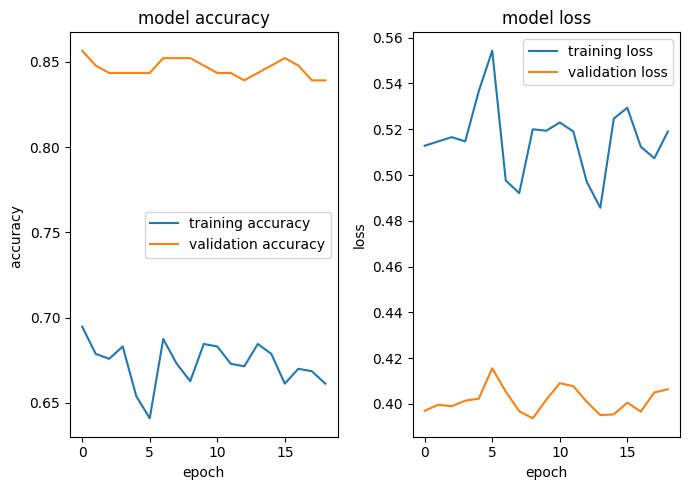

In [154]:
plt.figure(figsize=(7,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] , label="training accuracy")
plt.plot(history.history['val_accuracy'] , label ="validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy ")
plt.title("model accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] , label ="training loss")
plt.plot(history.history['val_loss'], label="validation loss")
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()

plt.tight_layout()
plt.show()